In [2]:
import numpy as np
import pandas as pd

In [ ]:
"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

In [25]:
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

###`Q-1:`
i. Create a DataFrame birds from the above dictionary data which has the index labels.

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [26]:
# code here
# i. Create a DataFrame birds from the above dictionary data which has the index labels.
df = pd.DataFrame(data,index = labels)
df

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


In [27]:
# ii. Display basic information about the dataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 440.0+ bytes


In [28]:
df.describe()

,age,visits
count,9.000000,11.000000
mean,4.333333,2.818182
std,1.903943,0.873863
min,1.500000,2.000000
25%,3.500000,2.000000
50%,4.000000,3.000000
75%,5.500000,3.500000
max,8.000000,4.000000


In [29]:
# iii. Show Alternate rows of the dataframe.
df.iloc[::2]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
k,Cranes,3.5,2,yes


###`Q-2:`
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [30]:
# code here
# i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']
df[['birds','age']].iloc[[0,2,6]]

,birds,age
a,Cranes,3.5
c,plovers,1.5
g,plovers,5.5


In [31]:
# ii. Select rows where the number of visits is less than 4.
df[df['visits']<4]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


###`Q-3:`
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [32]:
# code here
# i. Select all rows with nan values in age and visits column.
df[df['age'].isnull() | df['visits'].isnull()]

,birds,age,visits,priority
d,spoonbills,NaN,4,NaN
h,Cranes,NaN,2,yes


In [34]:
# ii. Fill nan with respective series mode value.
df.age.fillna(df.age.mode()[0], inplace=True)
df.visits.fillna(df.visits.mode()[0], inplace=True)

###`Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [38]:
# code here
# i. Find the total number of visits of the bird Cranes
df[df['birds']=='Cranes'].size

20

In [44]:
# ii. Find the number of each type of birds in dataframe.
df['birds'].value_counts()

,count
birds,
Cranes,5
spoonbills,4
plovers,2


##Question on IPL Data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

###`Q-5:` In IPL matches dataset some teams name has changed.
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [58]:
# code here
df1 = pd.read_csv('/content/IPL_Ball_by_Ball_2008_2022.csv', on_bad_lines='skip')
changeNames = {'Delhi Capitals':'Delhi Daredevils','Punjab Kings':'Kings XI Punjab',
               'Rising Pune Supergiant':'Rising Pune Supergiants'}
df1.replace(changeNames.keys(),changeNames.values(),inplace = True)
df1

<ipython-input-58-74d34209997c>:2: DtypeWarning: Columns (0,1,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/IPL_Ball_by_Ball_2008_2022.csv', on_bad_lines='skip')


,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0.0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0.0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0.0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0.0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0.0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261170,335982,2,14.0,5,P Kumar,I Sharma,SB Joshi,legbyes,0.0,1.0,1.0,0,0.0,NaN,NaN,NaN,Royal Challengers Bangalore
261171,335982,2,14.0,6,SB Joshi,I Sharma,P Kumar,NaN,1.0,0.0,1.0,0,0.0,NaN,NaN,NaN,Royal Challengers Bangalore
261172,335982,2,14.0,7,P Kumar,I Sharma,SB Joshi,NaN,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,Royal Challengers Bangalore
261173,335982,2,15.0,1,SB Joshi,LR Shukla,P Kumar,wides,0.0,1.0,1.0,0,0.0,NaN,NaN,NaN,Royal Challengers Bangalore


In [64]:
df1.sample()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
27917,1304054,2,11.0,5,AD Russell,OF Smith,SW Billings,NaN,6.0,0.0,6.0,0.0,0.0,NaN,NaN,NaN,Kolkata Knight Riders


###`Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


<Axes: xlabel='BattingTeam'>

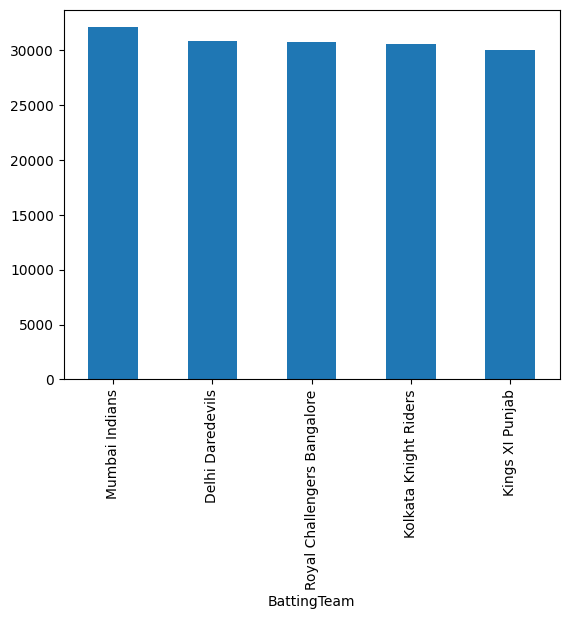

In [67]:
# code here
temp = df1['BattingTeam']
temp.value_counts().sort_values(ascending = False).head(5).plot(kind='bar')

###`Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [69]:
# code here
df1.sample()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
49472,1254084,2,15.0,6,KH Pandya,L Ngidi,KA Pollard,NaN,4.0,0.0,4.0,0,0.0,NaN,NaN,NaN,Mumbai Indians


###`Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [ ]:
# code here

### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



In [ ]:
# code here

### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [ ]:
# code here